In [2]:
import numpy as np
import pandas as pd
import math

import nltk


#load the csv of formant data from PRAAT
formants_df = pd.read_csv("formants.csv")
formants_df.head()
# formants_df["index"] = 
# formants_df["stressed"] = " "
# for index in formants_df.index:
#     if formants_df.syllable[index] == 1 :
#         formants_df.stressed[index] = "stress" 
#     else:
#         formants_df.stressed[index] = "unstressed"
# formants_df.tail()




formants_df = formants_df.astype({"syllable":"object","Filename":"object"})

# seg_freq = nltk.FreqDist(formants_df.segment)
# seg_freq
# segments = []
# for index, item in enumerate(seg_freq):
#     segments.append(item)
# print(len(segments))
# seg_freq


formants_df.info()
# Three measures of the relationship between the speaking style and vowel space were used: vowel space area, vowel space dispersion (both following Bradlow et al., 1996) and vowel peripheralization. 
# Vowel space area was measured as the Euclidean area covered by the triangle defined by the mean of each vowel category. 
# Vowel space dispersion was measured as the distance of each vowel from the central point in the talker’s F1×F2 space. 

# #An overall vowel space dispersion value for each talker was then calculated as the mean of these distances. Finally, the extent of peripheralization in clear speech relative to conversational speech was measured for each vowel category separately. Here, the Euclidean distance in the F1×F2 space between the average location of each vowel in conversational and in clear speech was calculated separately for each talker and each vowel category.

# corners_df.head()



FileNotFoundError: [Errno 2] No such file or directory: 'formants.csv'

In [ ]:
tilt_df = pd.read_csv("tilt.csv")
tilt_df.head()

,Filename,label,segment,syllable,h1,h2,h1-h2
0,9,ictus,ɵ,1,-25.737893,-1.831221,-23.906673
1,9,ictus,i,1,-8.604446,11.610210,-20.214656
2,9,ictus,uiː,1,-20.345912,3.949618,-24.295530
3,9,ictus,iː,1,-9.482358,10.368143,-19.850501
4,9,ictus,æ,1,-40.308210,-0.657925,-39.650284


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd


ictus_df = formants_df[formants_df.position=="ictus"]
off_ictus_df = formants_df[formants_df.position=="off"]


first_df = formants_df[formants_df.syllable==1]
second_df = formants_df[formants_df.syllable==2]

first_ictus_df = formants_df[(formants_df.syllable==1)& (formants_df.position=="ictus")]
second_ictus_df = formants_df[(formants_df.syllable==2)& (formants_df.position=="ictus")]
first_off_df = formants_df[(formants_df.syllable==1)& (formants_df.position=="off")]
second_off_df = formants_df[(formants_df.syllable==2)& (formants_df.position=="off")]

twoWay = [ictus_df,off_ictus_df,first_df,second_df, first_ictus_df,second_ictus_df,first_off_df,second_off_df]
twoLabels = ["ictus","off-ictus","1st (stressed)","2nd (unstressed)","stressed and ictus", "unstressed and ictus","stressed off-ictus", "unstressed off-ictus"]

seg_order = ["i","ɪ","y","e","ɛ","ø","æ","a","ɑ","ɵ","o","ʊ","u","ʎ" ]
eesti_colors = ['#f77189', '#ef7d32', '#c69432', '#a79f31', '#82a931', '#32b24e', '#34af8a', '#36ada4', '#37aabb', '#3aa6da', '#8197f4', '#c180f4', '#f45deb', '#f669ba']
seg_colors = {}
for index,item in enumerate(seg_order):
    seg_colors[item] = eesti_colors

# # vowDict = vow_space_df.to_dict('index')
# # vowDict
def vowelCharter(data,colorby,label):
    fig, ax = plt.subplots()
    ax = sns.scatterplot(x="F2",y="F1",data=data,hue=colorby,hue_order=seg_order)
    ax.set(title = label)
    ax.invert_xaxis()
    ax.invert_yaxis()
    # fig2, ax2 = plt.subplots()
    # ax2 = sns.kdeplot(data = data, x="F1",y="F2",hue=colorby)
    

def vowelChartOverlay(datalist,labellist,colorby):
   
    i = 0
    for item in datalist:
        fig1, ax1 = plt.subplots()
        fig1.suptitle("F1 and F2 measurements: " + labellist[i]+ " condition")
        ax1 = sns.scatterplot(x="F2",y="F1",data = item,hue=colorby,hue_order=seg_colors.keys(),palette=seg_colors)
        ax2 = sns.kdeplot(data = item, x="F1",y="F2",hue=colorby)
        
        
        ax1.invert_xaxis()
        ax1.invert_yaxis()
        i += 1

def vowelSpaceArea(dataframe):
    vowel_groups = dataframe.groupby("segment")

    vow_df = vowel_groups.aggregate(np.mean)

    F1_i = vow_df.at["i","F1"]
    F2_i = vow_df.at["i","F2"]

    F1_u = vow_df.at["u","F1"]
    F2_u = vow_df.at["u","F2"]

    F1_a = vow_df.at["a","F1"]
    F2_a = vow_df.at["a","F2"]

    euc_iu = math.sqrt((F1_i - F1_u)**2 + (F2_i-F2_u)**2)
    euc_ia = math.sqrt((F1_i - F1_a)**2 + (F2_i-F2_a)**2)
    euc_au = math.sqrt((F1_a - F1_u)**2 + (F2_a-F2_u)**2)
    s = (euc_au+euc_ia+euc_iu)/2
    vsa = math.sqrt(s*(s-euc_iu)*(s-euc_au)*(s-euc_ia))

    return vsa
    
# cat_vsa = []
# for  item in twoWay:
   

#     mean = vowelSpaceArea(item)
#     cat_vsa.append(mean)
# cat_vsa

# vsa_dict = dict(zip(twoLabels,cat_vsa))
# vsa_dict
    


i = 0
for item in twoWay:
    vowelCharter(item,"segment",twoLabels[i])
    i += 1


#vowelChartOverlay(twoWay,twoLabels,"segment")
# sylchart = sns.pairplot(vow_space_df,hue="syllable")
# icKchart = sns.pairplot(vow_space_df, hue="position")

#newChart = sns.kdeplot(data = vow_space_df, x="F1",y="F2",hue="segment")

# vowelCharter(vow_space_df[vow_space_df.segment=="a"],"position")

#for item in segments:
    #vowelCharter(vow_space_df[vow_space_df.segment==item],"syllable",item)


NameError: name 'formants_df' is not defined

In [ ]:
vowelSpaceArea(formants_df)

NameError: name 'vowelSpaceArea' is not defined

In [ ]:
from scipy import stats
import statsmodels.formula.api as smf


a_df = formants_df[formants_df.segment==( "a" or "ɑ") ]
i_df = formants_df[formants_df.segment==("i" or "ɪ" or "y" ) ]
u_df = formants_df[formants_df.segment==("u"or "ʊ")]
#o_df = formants_df[formants_df.segment==("o"or "ɵ")]



#column: euc distance from mean or mean euc distance of category





#smf.mixedlm("euc ~ position", data = a_df, groups = "performer").fit().summary()
#smf.mixedlm("F1 ~ position", data = a_df, groups = "performer").fit().summary()
#smf.mixedlm("F2 ~ position", data = a_df, groups = "performer").fit().summary()
#smf.mixedlm("F3 ~ position", data = a_df, groups = "performer").fit().summary()


#smf.mixedlm("euc ~ stressed", data = a_df, groups = "performer").fit().summary()
#smf.mixedlm("F1 ~ stressed", data = a_df, groups = "performer").fit().summary()
#smf.mixedlm("F2 ~ stressed", data = a_df, groups = "performer").fit().summary()
#smf.mixedlm("F3 ~ stressed", data = a_df, groups = "performer").fit().summary()

#smf.mixedlm("euc ~ position + stressed", data = a_df, groups = "performer").fit().summary()
#smf.mixedlm("F1 ~ position + stressed", data = a_df, groups = "performer").fit().summary()
#smf.mixedlm("F2 ~ position + stressed", data = a_df, groups = "performer").fit().summary()
#smf.mixedlm("F3 ~ position + stressed", data = a_df, groups = "performer").fit().summary()



def makeTables(data, variable):
    
    euc = smf.mixedlm("euc ~" + variable, data = data, groups = "performer").fit().summary()
    F1 = smf.mixedlm("F1 ~ "+ variable, data = data, groups = "performer").fit().summary()
    F2 = smf.mixedlm("F2 ~ "+ variable, data = data, groups = "performer").fit().summary()
    F3 = smf.mixedlm("F3 ~ "+ variable, data = data, groups = "performer").fit().summary()
    print( euc, F1, F2, F3)

periph = [a_df,i_df,u_df]
varia = ["position","syllable","position + syllable"]
def allTables():
    labels = ["a","i","u"]
    i = 0
    while i < 3: 
        j = 0
        while j < 3: 
            print(labels[i] + "," + str(varia[j])+ "\n")
            makeTables(periph[i],varia[j])
            j += 1
        i += 1
print(allTables())
#

#i_df.head()


#smf.mixedlm("euc ~ stressed", data = a_df, groups = "performer").fit().summary()
#smf.mixedlm("F1 ~ stressed", data = a_df, groups = "performer").fit().summary()
#smf.mixedlm("F2 ~ stressed", data = a_df, groups = "performer").fit().summary()
#smf.mixedlm("F3 ~ stressed", data = a_df, groups = "performer").fit().summary()

#smf.mixedlm("euc ~ position + stressed", data = a_df, groups = "performer").fit().summary()
#smf.mixedlm("F1 ~ position + stressed", data = a_df, groups = "performer").fit().summary()
#smf.mixedlm("F2 ~ position + stressed", data = a_df, groups = "performer").fit().summary()
#smf.mixedlm("F3 ~ position + stressed", data = a_df, groups = "performer").fit().summary()

    
    












#md = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"], re_formula="~Time")

a,position

            Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   euc       
No. Observations:   226       Method:               REML      
No. Groups:         3         Scale:                37715.1840
Min. group size:    8         Log-Likelihood:       -1504.6715
Max. group size:    130       Converged:            Yes       
Mean group size:    75.3                                      
--------------------------------------------------------------
                 Coef.   Std.Err.   z    P>|z|  [0.025  0.975]
--------------------------------------------------------------
Intercept        519.107   51.900 10.002 0.000 417.385 620.828
position[T.off]   76.414   26.376  2.897 0.004  24.719 128.109
performer Var   5451.920   40.155                             
              Mixed Linear Model Regression Results
Model:               MixedLM   Dependent Variable:   F1        
No. Observations:    226       Method:               REML      
No

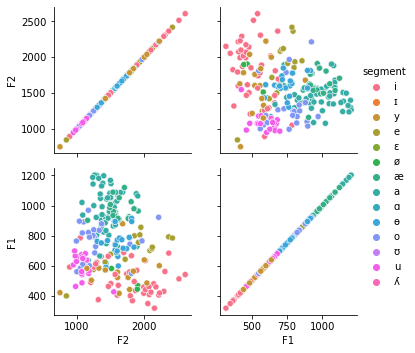

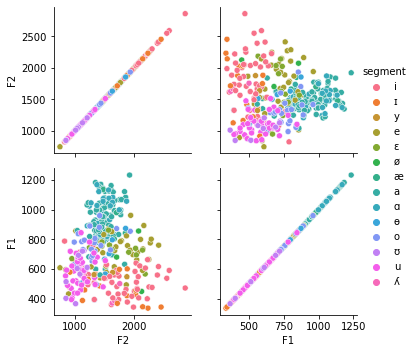

Error in callback <function flush_figures at 0x7fa3c9c6a700> (for post_execute):


KeyboardInterrupt: 

In [ ]:
seg_order = ["i","ɪ","y","e","ɛ","ø","æ","a","ɑ","ɵ","o","ʊ","u","ʎ" ]
eesti_colors = ['#f77189', '#ef7d32', '#c69432', '#a79f31', '#82a931', '#32b24e', '#34af8a', '#36ada4', '#37aabb', '#3aa6da', '#8197f4', '#c180f4', '#f45deb', '#f669ba']
seg_colors = {}
for index,item in enumerate(seg_order):
    seg_colors[item] = eesti_colors
variables = ["F1","F2","performer"]
# def vowelCharter(data,colorby):
#     fig, ax = plt.subplots()
#     #ax = sns.kdeplot(data = data, x="F1",y="F2",hue=colorby)
#     #ax.set_title(label)

# vowelCharter(formants_df,"segment")
positions = ["position","syllable"]
measurements = ["F2","F1"]
variables = ["F1","F2","F3","euc","position","syllable"]
#ax = sns.pairplot(data=formants_df,hue="segment")

def pairVowels(data):
    g = sns.PairGrid(data=data,hue="segment",hue_order = seg_order, vars=measurements)

    g.map(sns.scatterplot)
    



   # g.map_diag(sns.boxplot)
    # g.map_lower(sns.kdeplot)
    g.add_legend()


for item in twoWay:
    pairVowels(item)


In [ ]:
help(dict)

Help on class dict in module builtins:

class dict(object)
 |  dict() -> new empty dictionary
 |  dict(mapping) -> new dictionary initialized from a mapping object's
 |      (key, value) pairs
 |  dict(iterable) -> new dictionary initialized as if via:
 |      d = {}
 |      for k, v in iterable:
 |          d[k] = v
 |  dict(**kwargs) -> new dictionary initialized with the name=value pairs
 |      in the keyword argument list.  For example:  dict(one=1, two=2)
 |  
 |  Built-in subclasses:
 |      StgDict
 |  
 |  Methods defined here:
 |  
 |  __contains__(self, key, /)
 |      True if the dictionary has the specified key, else False.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |  

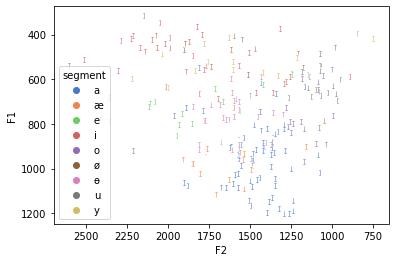

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
# plt.style.use('ggplot')


ictus_df = formants_df[formants_df.position=="ictus"]

chart = sns.scatterplot(x="F2",y="F1",data=ictus_df,marker = r'$\mathrm{ɪ}$', hue="segment",palette="muted",markers="$\alpha$")
chart.invert_xaxis()
chart.invert_yaxis()



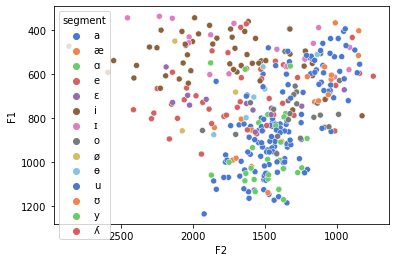

In [ ]:

import pandas as pd
import seaborn as sns
off_ictus_df = formants_df[formants_df.position=="off"]

chart = sns.scatterplot(x="F2",y="F1",data=off_ictus_df,hue="segment",palette="muted")
chart.invert_xaxis()
chart.invert_yaxis()



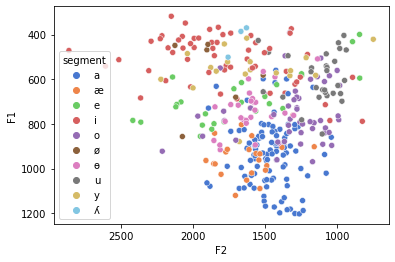

In [ ]:

import pandas as pd
import seaborn as sns
first_df = formants_df[formants_df.syllable==1]

chart = sns.scatterplot(x="F2",y="F1",data=first_df,hue="segment",palette="muted")
chart.invert_xaxis()
chart.invert_yaxis()
# first_df.head()


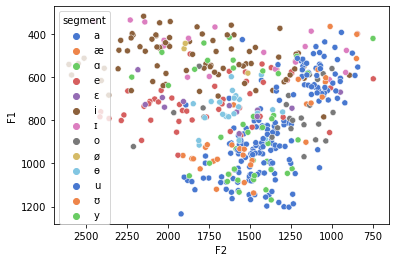

In [ ]:

import pandas as pd
import seaborn as sns
second_df = formants_df[formants_df.syllable==2]

chart = sns.scatterplot(x="F2",y="F1",data=second_df,hue="segment",palette="muted")
chart.invert_xaxis()
chart.invert_yaxis()



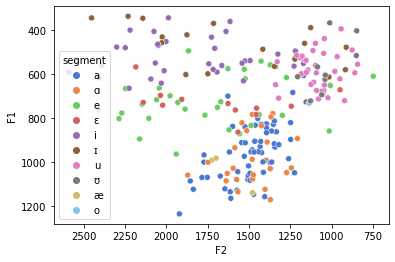

In [ ]:
first_ictus_df = formants_df[(formants_df.syllable==1)& (formants_df.position=="ictus")]
second_ictus_df = formants_df[(formants_df.syllable==2)& (formants_df.position=="ictus")]
first_off_df = formants_df[(formants_df.syllable==1)& (formants_df.position=="off")]
second_off_df = formants_df[(formants_df.syllable==2)& (formants_df.position=="off")]

chart = sns.scatterplot(x="F2",y="F1",data=second_off_df,hue="segment",palette="muted")
chart.invert_xaxis()
chart.invert_yaxis()
